#Hello World of Artificial Intelligence - One

In [ ]:
import numpy as np
import tensorflow as tf
import keras
from keras import layers
import matplotlib.pyplot as plt


In [ ]:
# Load and preprocess the MNIST dataset from a .npz file
with np.load('mnist.npz') as data:
    train_images, train_labels = data['x_train'], data['y_train']
    test_images, test_labels = data['x_test'], data['y_test']

train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
# Create the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(train_images.reshape(-1, 28, 28, 1), train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 25s 12ms/step - loss: 0.1568 - accuracy: 0.9536
Epoch 2/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0534 - accuracy: 0.9838
Epoch 3/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0340 - accuracy: 0.9900
Epoch 4/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0218 - accuracy: 0.9934
Epoch 5/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0165 - accuracy: 0.9946


In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images.reshape(-1, 28, 28, 1), test_labels)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

313/313 [==============================] - 2s 5ms/step - loss: 0.0505 - accuracy: 0.9848
Test accuracy: 98.48%


In [ ]:

# Visualize misclassifications
predictions = model.predict(test_images.reshape(-1, 28, 28, 1))
misclassified_indices = np.where(np.argmax(predictions, axis=1) != test_labels)[0]

313/313 [==============================] - 1s 3ms/step


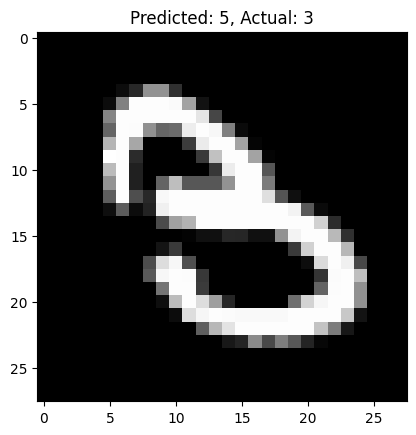

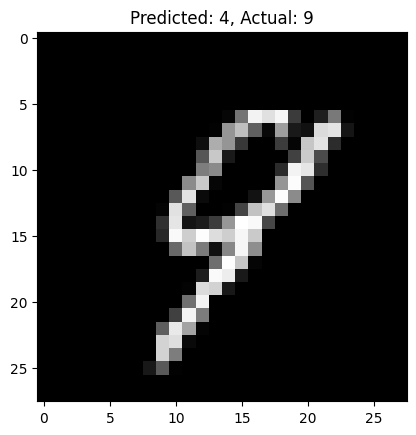

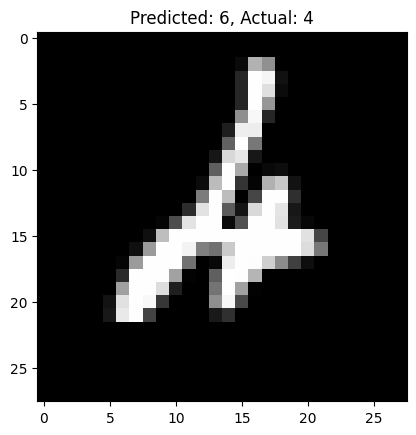

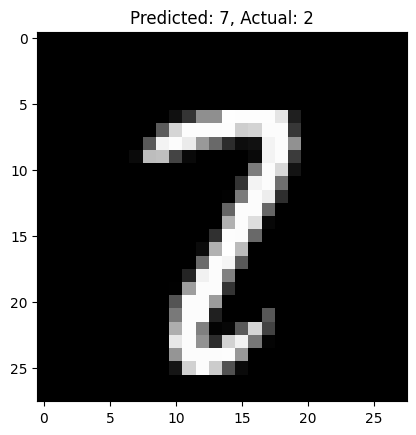

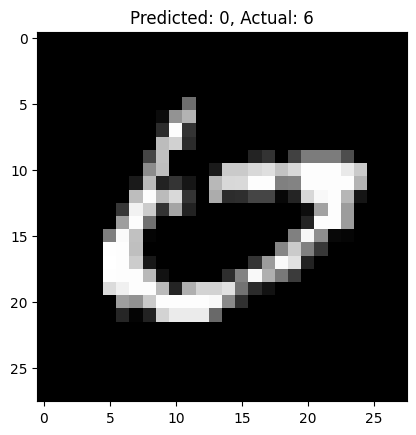

In [ ]:
for idx in misclassified_indices[:5]:  # Display the first 5 misclassifications
    plt.imshow(test_images[idx], cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[idx])}, Actual: {test_labels[idx]}")
    plt.show()

#Dogs vs. Cats - Two

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers  # Import layers module
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from google.colab import drive
import zipfile
import PIL
from PIL import Image
import numpy as np
import os

In [9]:
# Mount Google Drive
drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive/


In [11]:
# Define file paths and parameters
train_zip_path = '/content/drive/My Drive/Datasets/train.zip'
train_dir = '/content/train'
test_zip_path = '/content/drive/My Drive/Datasets/test1.zip'
test_dir = '/content/test'

batch_size = 32
epochs = 1

In [12]:
# Extract the dataset from the zip file
with zipfile.ZipFile(train_zip_path, 'r') as zip_ref:
    zip_ref.extractall(train_dir)
with zipfile.ZipFile(test_zip_path, 'r') as zip_ref:
    zip_ref.extractall(test_dir)

In [13]:
# Data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [14]:
DATA_DIR = "/content/train/train"
# Load and preprocess the data, checking for valid images
def load_and_preprocess_image(image_path):
    try:
        img = Image.open(image_path)
        img = img.resize((150, 150))
        img = keras.preprocessing.image.img_to_array(img)
        img /= 255.0
        return img
    except (OSError, PIL.UnidentifiedImageError):
        return None

# Create lists to store image data and labels
images = []
labels = []

In [15]:
import random
# A list of image files in the training directory
image_files = os.listdir(DATA_DIR)

# Shuffle the list of image files
random.shuffle(image_files)

# Load only 50% of the data
num_images_to_load = len(image_files) // 2

for image_file in image_files[:num_images_to_load]:
    image_path = os.path.join(DATA_DIR, image_file)
    img = load_and_preprocess_image(image_path)
    if img is not None:
        images.append(img)
        # Extract the label from the image filename
        label = 0 if "cat" in image_file else 1  # 0 for cats, 1 for dogs
        labels.append(label)

In [16]:
# Split data into training and validation sets
images_train, images_val, labels_train, labels_val = train_test_split(images, labels, test_size=0.2, random_state=42)

# Convert lists to NumPy arrays
images_train = np.array(images_train)
images_val = np.array(images_val)
labels_train = np.array(labels_train)
labels_val = np.array(labels_val)


# Convert labels to categorical format
labels_train = to_categorical(labels_train)
labels_val = to_categorical(labels_val)

In [17]:
# Create the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [18]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model with your data
history = model.fit(images_train, labels_train, validation_data=(images_val, labels_val),
                    batch_size=batch_size, epochs=epochs)

In [ ]:
# Visualize training history
plt.plot(history.history['accuracy'], label='Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Make predictions for the test data
# Define the directory containing test images
test_dir = '/content/test'

# Initialize an empty list to store predictions
predictions = []

# Define a function to load and preprocess images
def load_and_preprocess_image(image_path):
    img = keras.preprocessing.image.load_img(image_path, target_size=(150, 150))
    img = keras.preprocessing.image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.0
    return img

# Make predictions for each image in the test directory
for image_file in os.listdir(test_dir):
    # Construct the full path to the image
    image_path = os.path.join(test_dir, image_file)

    # Load and preprocess the image
    img = load_and_preprocess_image(image_path)

    # Make the prediction
    if img is not None:
        prediction = model.predict(img)
        prediction_label = "Cat" if prediction[0] < 0.5 else "Dog"
        predictions.append((image_file, prediction_label))

# Display the first 10 predictions
for i in range(10):
    image_file, prediction_label = predictions[i]
    image_path = os.path.join(test_dir, image_file)
    plt.imshow(Image.open(image_path))
    plt.title(f"Predicted: {prediction_label}")
    plt.show()
